<a href="https://colab.research.google.com/github/Biokatzen/Hepatitis-C-Prediction-Dataset/blob/main/HepatitisC_Prediction_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hepatitis C Prediction Dataset

The dataset used in this study contains data from female and male blood donors and patients suffering from hepatitis C, fibrosis and cirrhosis with ages ranged from 19 to 77. These are the categorical variables that will be used for classification and clustering later on. The numerical variables are the following: ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT, which are traditional diagnostic tests for liver diseases.

The table below resumes all the attributes found in this dataset:


| **Attribute** | **Value** | **Value Label** | **Type** | **Description** |
|----------------|----------------|-----------------|-----------|-----------------|
| **Patient ID/No.** | Numeric | – | Integer | Patient identification |
| **Category** | 0 | Blood Donor | Categorical | Diagnosis of the patient. Blood donor vs Hepatitis C including its progress to Fibrosis and Cirrhosis |
|  | 0s | Suspect Blood Donor |  |  |
|  | 1 | Hepatitis |  |  |
|  | 2 | Fibrosis |  |  |
|  | 3 | Cirrhosis |  |  |
| **Age** | Numeric | – | Integer |  |
| **Sex** | f | Female | Binary |  |
|  | m | Male |  |  |
| **ALB** | Numeric | – | Continuous | Albumin Blood Test (g/L)|
| **ALP** | Numeric | – | Continuous | Alkaline Phosphatase (U/L) |
| **ALT** | Numeric | – | Continuous | Alanine Transaminase (U/L) |
| **AST** | Numeric | – | Continuous | Aspartate Transaminase (U/L)|
| **BIL** | Numeric | – | Continuous | Bilirubin (µmol/L) |
| **CHE** | Numeric | – | Continuous | Acetylcholinesterase (U/mL)|
| **CHOL** | Numeric | – | Continuous | Cholesterol (mmol/L) |
| **CREA** | Numeric | – | Continuous | Creatinine (µmol/L) |
| **GGT** | Numeric | – | Continuous | Gamma-Glutamyl Transferase (U/L) |
| **PROT** | Numeric | – | Continuous | Total Protein (g/L)|


In [1]:
import pandas as pd
import os

Firstly, the dataset is loaded into google colab  enviroment and printed to have a first look. As we can see below, the dataset has 615 rows and 14 columns

In [2]:
location = '/content/drive/MyDrive/Colab Notebooks'
os.chdir(location)
df = pd.read_csv('HepatitisCdata.csv', header=0, sep=';')
df.shape
print(df)

     Unnamed: 0       Category  Age Sex   ALB    ALP    ALT    AST   BIL  \
0             1  0=Blood Donor   32   m  38.5   52.5    7.7   22.1   7.5   
1             2  0=Blood Donor   32   m  38.5   70.3   18.0   24.7   3.9   
2             3  0=Blood Donor   32   m  46.9   74.7   36.2   52.6   6.1   
3             4  0=Blood Donor   32   m  43.2   52.0   30.6   22.6  18.9   
4             5  0=Blood Donor   32   m  39.2   74.1   32.6   24.8   9.6   
..          ...            ...  ...  ..   ...    ...    ...    ...   ...   
610         611    3=Cirrhosis   62   f  32.0  416.6    5.9  110.3  50.0   
611         612    3=Cirrhosis   64   f  24.0  102.8    2.9   44.4  20.0   
612         613    3=Cirrhosis   64   f  29.0   87.3    3.5   99.0  48.0   
613         614    3=Cirrhosis   46   f  33.0    NaN   39.0   62.0  20.0   
614         615    3=Cirrhosis   59   f  36.0    NaN  100.0   80.0  12.0   

       CHE  CHOL   CREA    GGT  PROT  
0     6.93  3.23  106.0   12.1  69.0  
1    11.1

As we can see, the first column should be the Patient ID/No. but in the dataset appears as an unnamed column, so the dataset has to be modified to add this column name. Additionally, it would be better to have the values male and female in the sex column, instead of f and m, which are less informative


In [3]:
df.rename(columns={'Unnamed: 0': 'Patient ID'}, inplace=True)
df['Sex'] = df['Sex'].replace({'m': 'male', 'f': 'female'})
print(df)

     Patient ID       Category  Age     Sex   ALB    ALP    ALT    AST   BIL  \
0             1  0=Blood Donor   32    male  38.5   52.5    7.7   22.1   7.5   
1             2  0=Blood Donor   32    male  38.5   70.3   18.0   24.7   3.9   
2             3  0=Blood Donor   32    male  46.9   74.7   36.2   52.6   6.1   
3             4  0=Blood Donor   32    male  43.2   52.0   30.6   22.6  18.9   
4             5  0=Blood Donor   32    male  39.2   74.1   32.6   24.8   9.6   
..          ...            ...  ...     ...   ...    ...    ...    ...   ...   
610         611    3=Cirrhosis   62  female  32.0  416.6    5.9  110.3  50.0   
611         612    3=Cirrhosis   64  female  24.0  102.8    2.9   44.4  20.0   
612         613    3=Cirrhosis   64  female  29.0   87.3    3.5   99.0  48.0   
613         614    3=Cirrhosis   46  female  33.0    NaN   39.0   62.0  20.0   
614         615    3=Cirrhosis   59  female  36.0    NaN  100.0   80.0  12.0   

       CHE  CHOL   CREA    GGT  PROT  


An important pre-processing step is handle the NA values. Firstly the NA values are counted by column to have an idea of how many are they.

In [4]:
df.isna().sum()


,0
Patient ID,0
Category,0
Age,0
Sex,0
ALB,1
ALP,18
ALT,1
AST,0
BIL,0
CHE,0


As we can see above, the columns with the most NA values are CHOL and ALP with 10 and 18 NA values respectively. But as the dataset has 615 rows, removing these rows won't make a big impact in the model

In [7]:
df_without_na = df.dropna()
print(df_without_na)


     Patient ID       Category  Age     Sex   ALB    ALP   ALT    AST   BIL  \
0             1  0=Blood Donor   32    male  38.5   52.5   7.7   22.1   7.5   
1             2  0=Blood Donor   32    male  38.5   70.3  18.0   24.7   3.9   
2             3  0=Blood Donor   32    male  46.9   74.7  36.2   52.6   6.1   
3             4  0=Blood Donor   32    male  43.2   52.0  30.6   22.6  18.9   
4             5  0=Blood Donor   32    male  39.2   74.1  32.6   24.8   9.6   
..          ...            ...  ...     ...   ...    ...   ...    ...   ...   
608         609    3=Cirrhosis   58  female  34.0   46.4  15.0  150.0   8.0   
609         610    3=Cirrhosis   59  female  39.0   51.3  19.6  285.8  40.0   
610         611    3=Cirrhosis   62  female  32.0  416.6   5.9  110.3  50.0   
611         612    3=Cirrhosis   64  female  24.0  102.8   2.9   44.4  20.0   
612         613    3=Cirrhosis   64  female  29.0   87.3   3.5   99.0  48.0   

       CHE  CHOL   CREA    GGT  PROT  
0     6.93  

The next step is to have a look to the outliers of every variable. For this, the z-score is calculated for all numerical variables. For this, we need to remove the categorical variables that appears as numbers before calculating the z-score and add them afterwards

In [26]:

import numpy as np
from scipy.stats import zscore

exclude_cols = ['Patient ID', 'Age'] #Categorical columns that have numerical values
numerical_cols = df_without_na.select_dtypes(include=np.number).columns
continuous_cols = [c for c in numerical_cols if c not in exclude_cols] #All numerical columns excluding the ones in exclude_cols

df_scaled = df_without_na.copy()
df_scaled[continuous_cols] = df_without_na[continuous_cols].apply(zscore) #Z-score applied

print(df_scaled.head())


mask = (np.abs(df_scaled[continuous_cols]) < 3).all(axis=1) #Filter out the rows with a score higher than 3
df_no_outliers = df_scaled[mask].copy()
print(df_no_outliers.head())

   Patient ID       Category  Age   Sex       ALB       ALP       ALT  \
0           1  0=Blood Donor   32  male -0.542701 -0.603230 -0.905494   
1           2  0=Blood Donor   32  male -0.542701  0.084054 -0.411380   
2           3  0=Blood Donor   32  male  0.916417  0.253944  0.461714   
3           4  0=Blood Donor   32  male  0.273710 -0.622536  0.193070   
4           5  0=Blood Donor   32  male -0.421108  0.230777  0.289014   

        AST       BIL       CHE      CHOL      CREA       GGT      PROT  
0 -0.355457 -0.202289 -0.581777 -1.916091  0.480336 -0.481022 -0.540788  
1 -0.276283 -0.409283  1.354993 -0.524241 -0.151402 -0.416513  0.862566  
2  0.573318 -0.282787  0.290683 -0.169629  0.085500 -0.092127  1.386485  
3 -0.340231  0.453193 -0.399063 -0.577433 -0.032951 -0.081068  0.712875  
4 -0.273238 -0.081542  0.432286 -0.949775 -0.111918 -0.152949 -0.596922  
       Patient ID         Age         ALB           ALP         ALT  \
count  589.000000  589.000000  589.000000  5.8

Below we have quiantified the amount of outliers removed:

In [22]:
print(f"Original rows: {df_scaled.shape[0]}")
print(f"Rows after eliminating outliers: {df_no_outliers.shape[0]}")
print(f"Outliers removed: {df_scaled.shape[0] - df_no_outliers.shape[0]}")


Original rows: 589
Rows after eliminating outliers: 532
Outliers removed: 57


Additionally, a boxplot has been created to visualize the different of the continuous variables with and without outliers

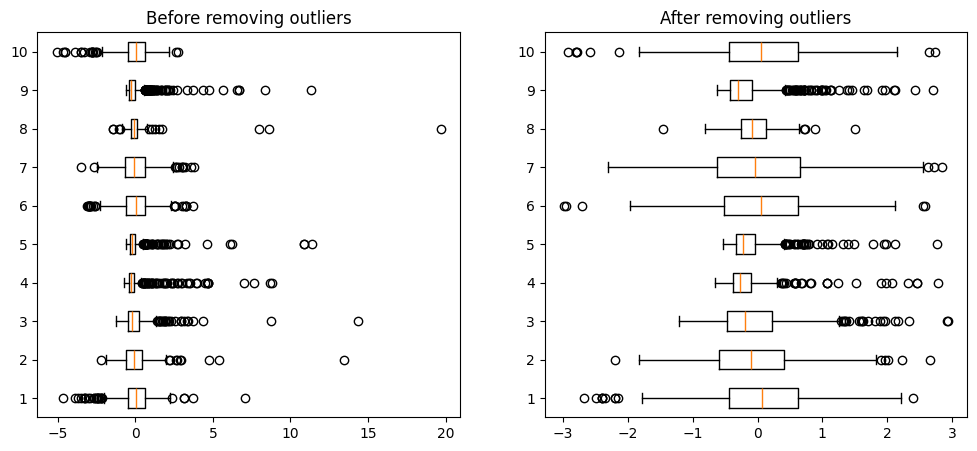

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.boxplot(df_scaled[continuous_cols], vert=False)
plt.title("Before removing outliers")

plt.subplot(1,2,2)
plt.boxplot(df_no_outliers[continuous_cols], vert=False)
plt.title("After removing outliers")

plt.show()


After checking before and after removing outliers, makes more sense to continue with the dataset without outliers to not disturb the linear regression model. Also, some outliers have quite big z scores which are more likely lab errors.

Following the pre-processing steps, the categorical variables 'Category' and 'Sex' need to be converted into a numerical format. As any of them have ordinal categories, the method chosen is One-Hot Encoding.

In [27]:
df_encoded = pd.get_dummies(df_no_outliers, columns=['Category', 'Sex'], prefix=['Category', 'Sex'], dtype=int)
#To have binary numbers intead of booleans it is important to specify dtype=int in the get_dummies function.
print(df_encoded.head)

<bound method NDFrame.head of      Patient ID  Age       ALB       ALP       ALT       AST       BIL  \
0             1   32 -0.542701 -0.603230 -0.905494 -0.355457 -0.202289   
1             2   32 -0.542701  0.084054 -0.411380 -0.276283 -0.409283   
2             3   32  0.916417  0.253944  0.461714  0.573318 -0.282787   
3             4   32  0.273710 -0.622536  0.193070 -0.340231  0.453193   
4             5   32 -0.421108  0.230777  0.289014 -0.273238 -0.081542   
..          ...  ...       ...       ...       ...       ...       ...   
580         581   68  0.238969 -1.746129 -1.035019  0.253576  0.056454   
589         590   45 -2.192895 -2.194022 -0.934277  2.074584  1.148923   
599         600   59 -0.976963 -0.711342 -1.025424  2.324287  1.493914   
607         608   52 -0.455849 -1.201707 -1.212516 -0.102708  0.573939   
612         613   64 -2.192895  0.740448 -1.106977  1.986274  2.126396   

          CHE      CHOL      CREA       GGT      PROT  Category_0=Blood Donor  \


As we can see in the Category columns, the rows that corresponded to 'Suspect Blood Donor' have been eliminated during the outliers removal, which is positive as this category was quite uncertain.




